<a href="https://colab.research.google.com/github/Subham1100/Data_Analysis/blob/main/LogisticRegression_titanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

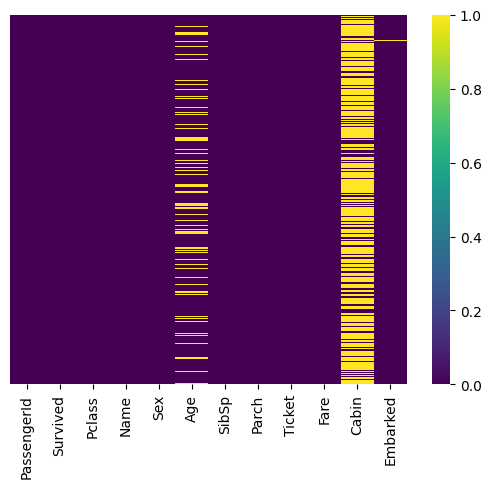

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

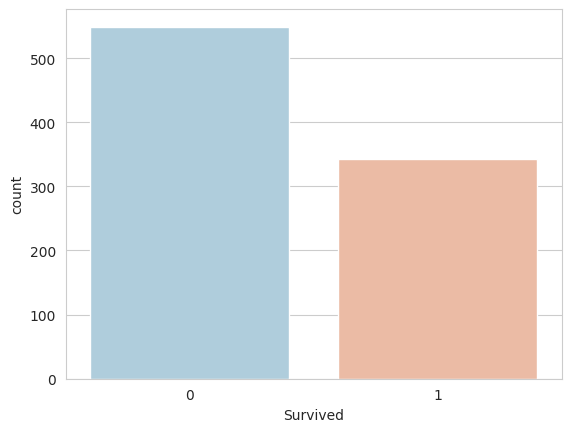

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

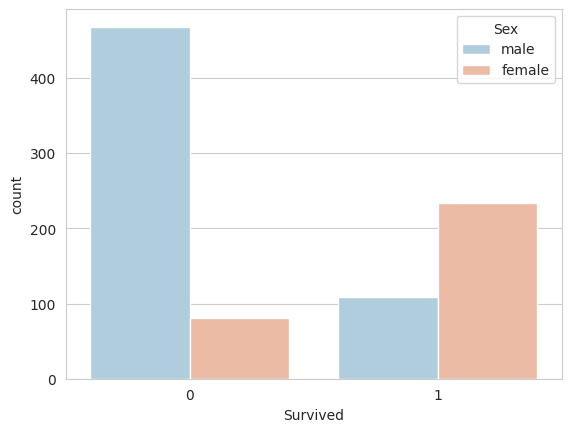

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

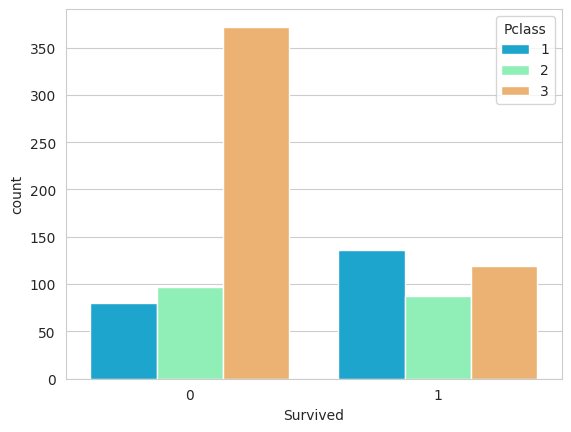

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

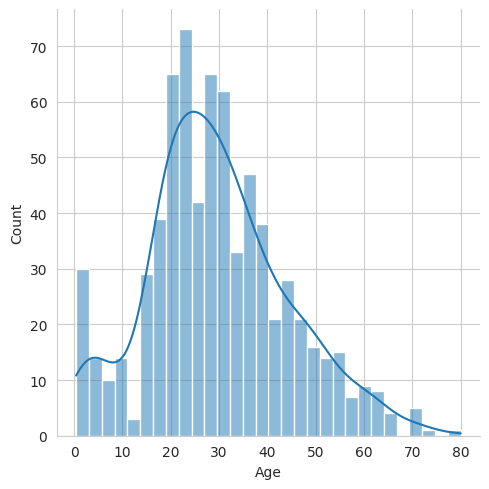

In [8]:
sns.displot(train['Age'].dropna(),kde=True,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

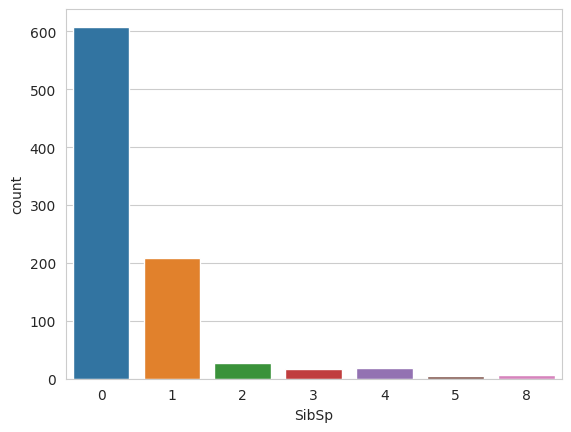

In [9]:
sns.countplot(x='SibSp',data =train)

<Axes: >

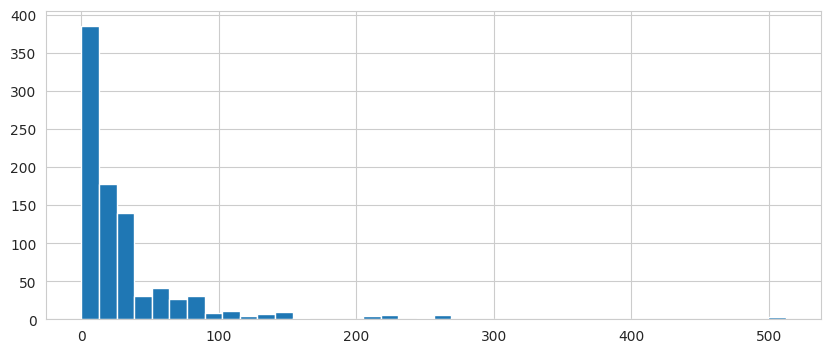

In [10]:
train['Fare'].hist(bins=40,figsize=(10,4))

<Axes: xlabel='Pclass', ylabel='Age'>

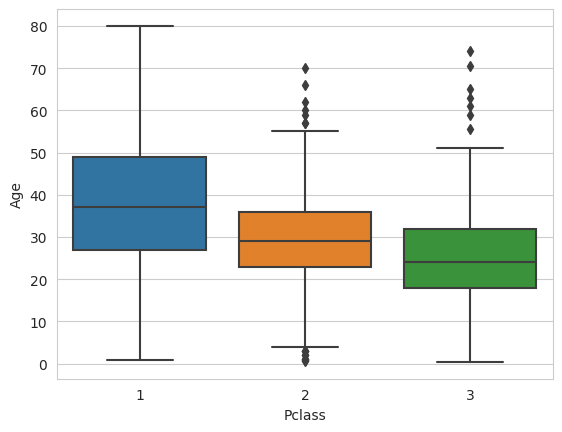

In [11]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [12]:
mean_age_by_pclass = train.groupby('Pclass')['Age'].mean()

print("Mean age of passengers for each Pclass:")
print(mean_age_by_pclass.loc[3])

Mean age of passengers for each Pclass:
25.14061971830986


In [13]:
def impute_age (cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    return mean_age_by_pclass[Pclass]
  return Age

In [14]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

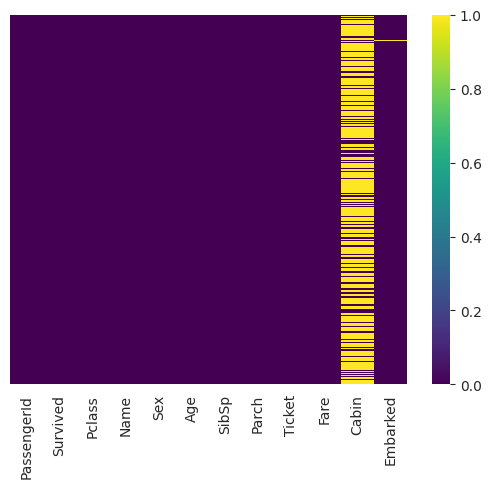

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [16]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

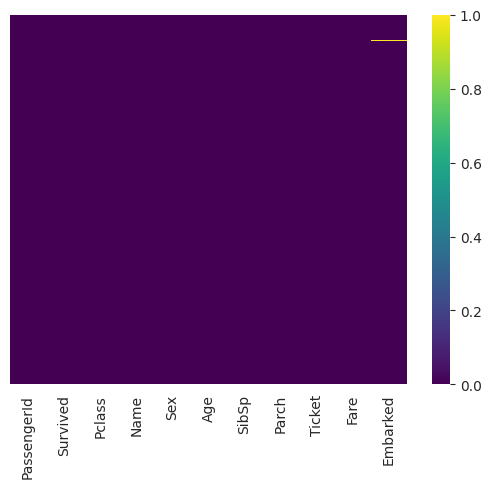

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [18]:
train.dropna(inplace=True)

<Axes: >

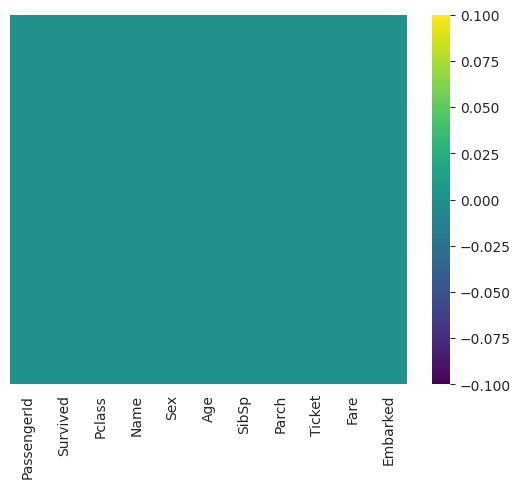

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [24]:
pd.get_dummies(train['Sex']).drop('female',axis=1)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [25]:
sex = pd.get_dummies(train['Sex']).drop('female',axis=1)

In [27]:
pd.get_dummies(train['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [28]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [29]:
train = pd.concat([train,sex,embark],axis = 1)

In [30]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [34]:
train.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace = True)

KeyError: ignored

In [35]:
train.drop(['PassengerId'],axis=1,inplace = True)

In [36]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.00000,0,0,13.00,1,0,1
887,1,1,19.00000,0,0,30.00,0,0,1
888,0,3,25.14062,1,2,23.45,0,0,1
889,1,1,26.00000,0,0,30.00,1,0,0
890,0,3,32.00000,0,0,7.75,1,1,0


In [44]:
X = train.drop(['Survived'],axis=1)
y=train['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
prediction  = logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,prediction))

[[149  14]
 [ 31  73]]
